In [1]:
import zeus21
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors
import matplotlib.lines as mlines
#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()
from scipy.special import erfc,erf
import sys
sys.path.append('../21cm_ETHOS/21cmFAST-ethos-analysis-main/')
import sheth_tormen as st
from sheth_tormen import load_ethos_sims as sim

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as P15
from astropy import constants as const
import astropy.units as u
import pickle

import matplotlib as mpl
plt.style.use(['default','seaborn','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 150

import seaborn as sns
sns.set_palette("flare")


/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_89366/1477574829.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['default','seaborn','seaborn-ticks'])
/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_89366/1477574829.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['default','seaborn','seaborn-ticks'])


In [2]:

CosmoParams_input = zeus21.Cosmo_Parameters_Input(kmax_CLASS=1000)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo)


In [3]:
k = np.logspace(-2,2.67,1000)
k_peak = [50,70,100,200]#np.linspace(50,100,2)
h_peak = [0.05,0.1,0.15,0.2,0.3,0.4,0.0]

In [4]:
hmf_dict = {} #hpeak 0-1 in 0.05 steps - kpeak 30-300

for i in range(len(h_peak)):
    for j in range(len(k_peak)):
        parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=h_peak[i], k_peak=k_peak[j], Flag_ETHOS=True)
        y = zeus21.HMF_interpolator(parcos,ClassyCosmo)
        hmf_dict.update({(h_peak[i],k_peak[j]):y})

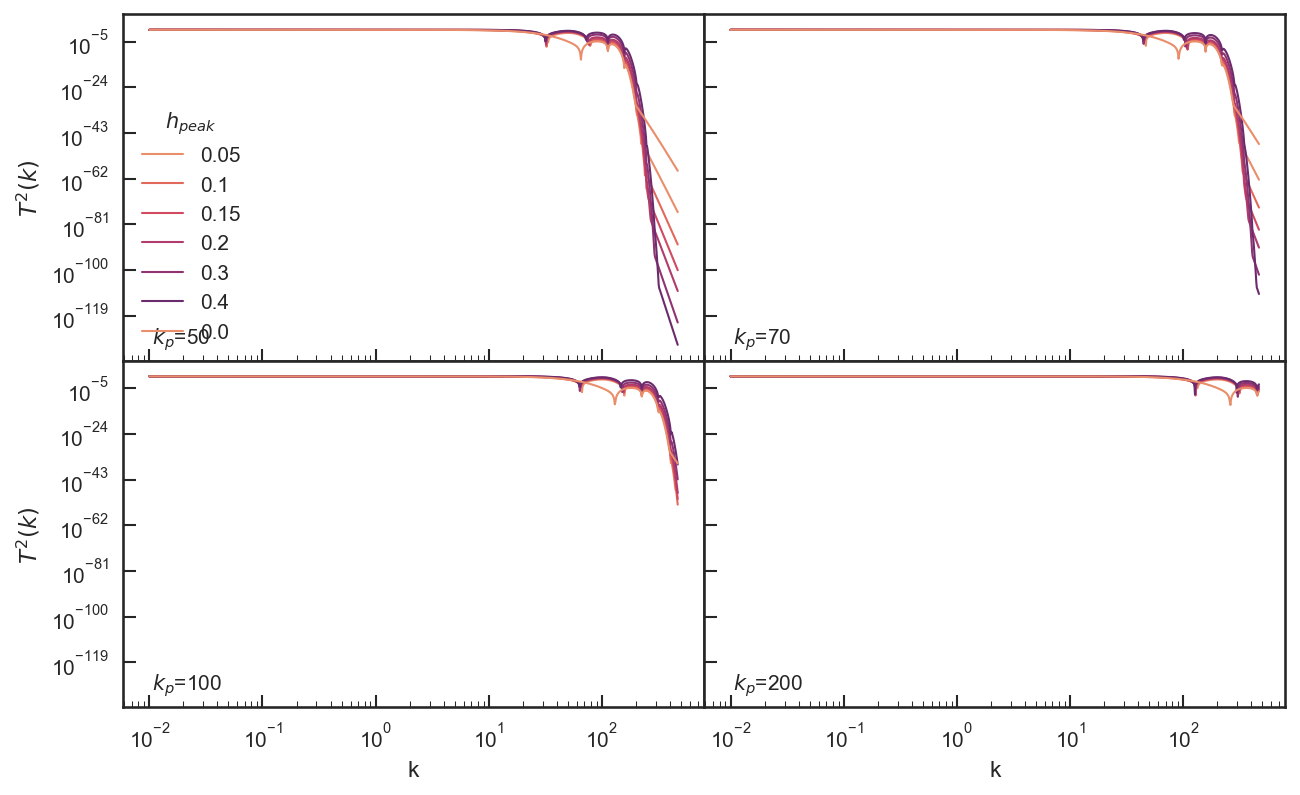

In [5]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

# Scalar mappable of normalized array to colormap
# Normalize the array vals so they can be mapped to a color


for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        
        ax[j].loglog(k, zeus21.T_ETHOS(k, kp, hp, c=-20)**2, lw=1, label=hp)        

    ax[j].set_xlabel('k')
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel('$T^2(k)$')

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
        
    #ax[j].set_xlim(5e0,2*1e2)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='left', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

In [6]:
num_colors = 5  # Adjust this to the desired number of colors

# Generate a list of colors from the "flare" palette
colors = sns.color_palette("flare", n_colors=num_colors)

Text(0, 0.5, '$T^2_L(k)$')

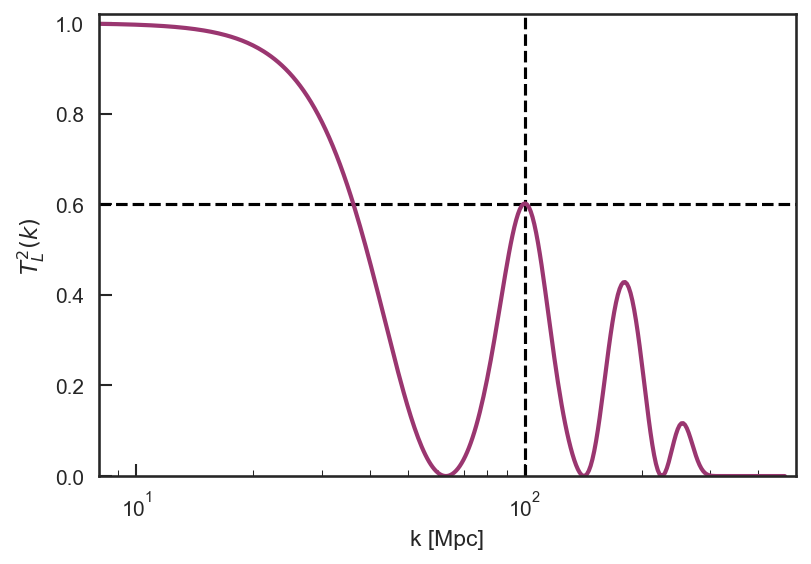

In [7]:

plt.axhline(y=0.6, color='k', lw=1.5, linestyle='--')
plt.axvline(x=100, color='k', lw=1.5,linestyle='--')
plt.semilogx(k, zeus21.T_ETHOS(k, 100, 0.6, c=-20)**2, c=colors[-2],lw=2)  
plt.xlim(8e0,5*1e2)
plt.ylim(0,1.02)
plt.xlabel('k [Mpc]')
plt.ylabel('$T^2_L(k)$')

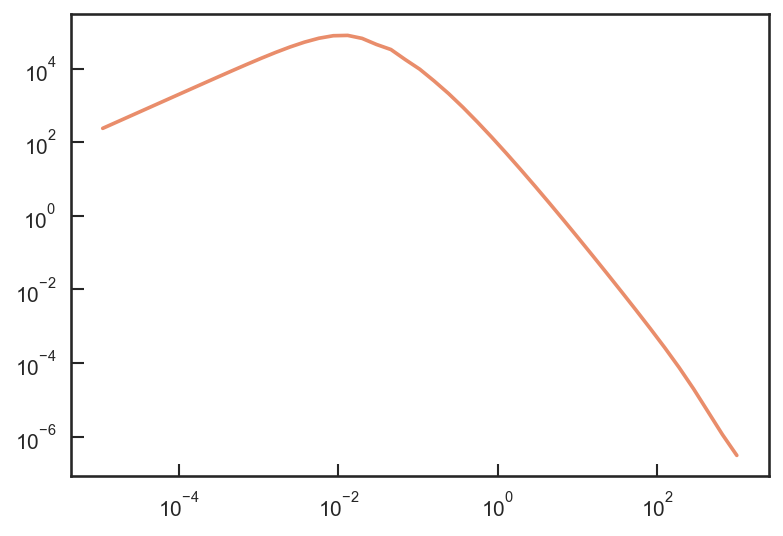

In [8]:
eth_zeus = zeus21.HMF_interpolator(parcos, ClassyCosmo)
plt.loglog(eth_zeus.klist,eth_zeus.CLASS_Pk,'-',label='CLASS')


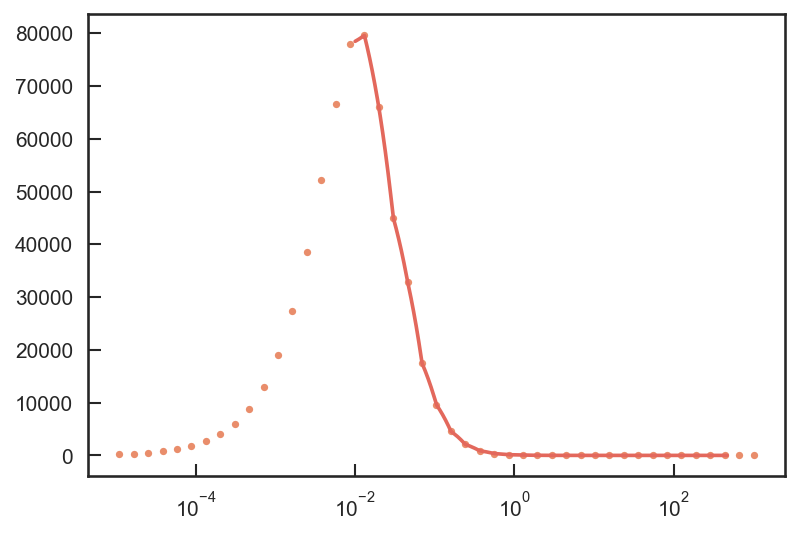

In [9]:

Pkint = scipy.interpolate.interp1d(eth_zeus.klist,eth_zeus.CLASS_Pk)(k)
eth_zeus = zeus21.HMF_interpolator(parcos, ClassyCosmo)
plt.plot(eth_zeus.klist,eth_zeus.CLASS_Pk,'.',label='CLASS')
plt.semilogx(k,Pkint,'-')

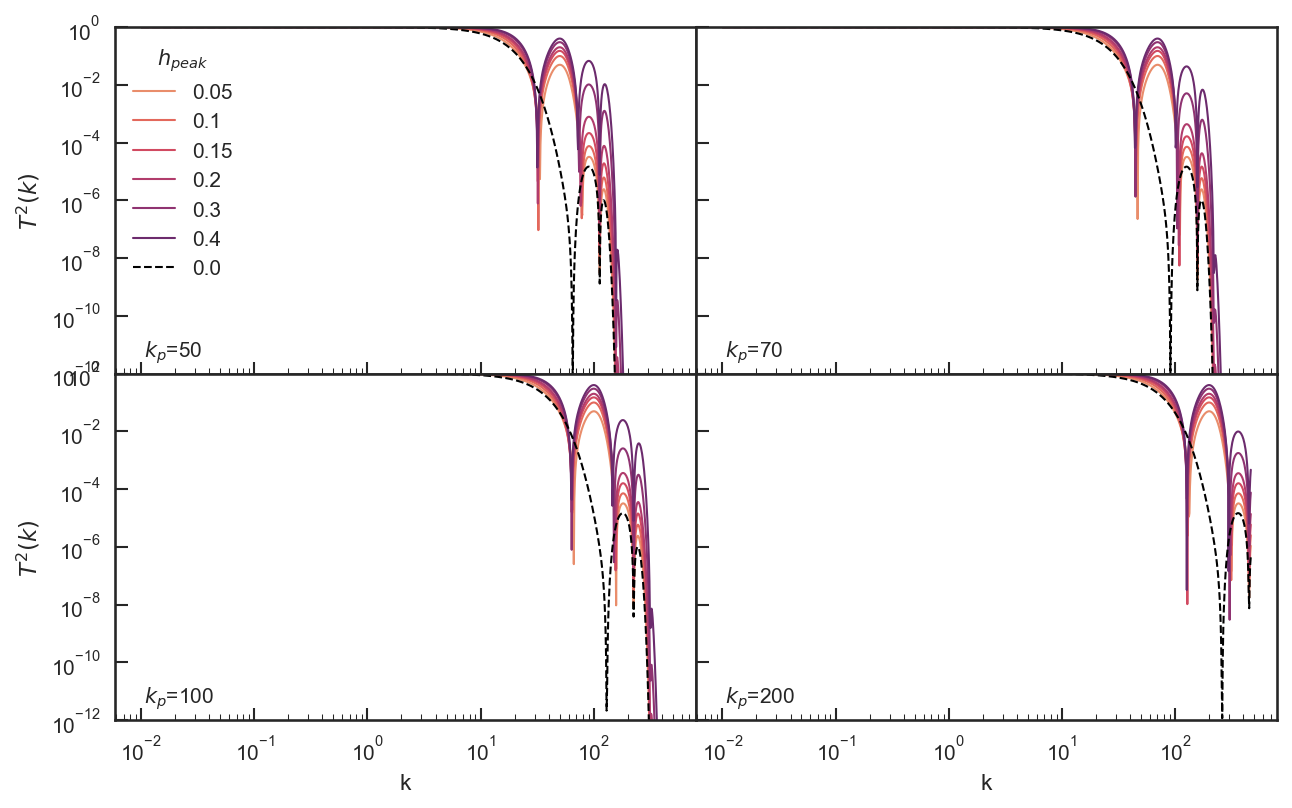

In [10]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

# Scalar mappable of normalized array to colormap
# Normalize the array vals so they can be mapped to a color


for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        if hp == 0.0:
            ax[j].loglog(k, zeus21.T_ETHOS(k, kp, hp, c=-20)**2, 'k--',lw=1, label=hp)    
        else:
            ax[j].loglog(k, zeus21.T_ETHOS(k, kp, hp, c=-20)**2, lw=1, label=hp)        

    ax[j].set_xlabel('k')
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel('$T^2(k)$')

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
        
    ax[j].set_ylim(1e-12,1)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='left', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

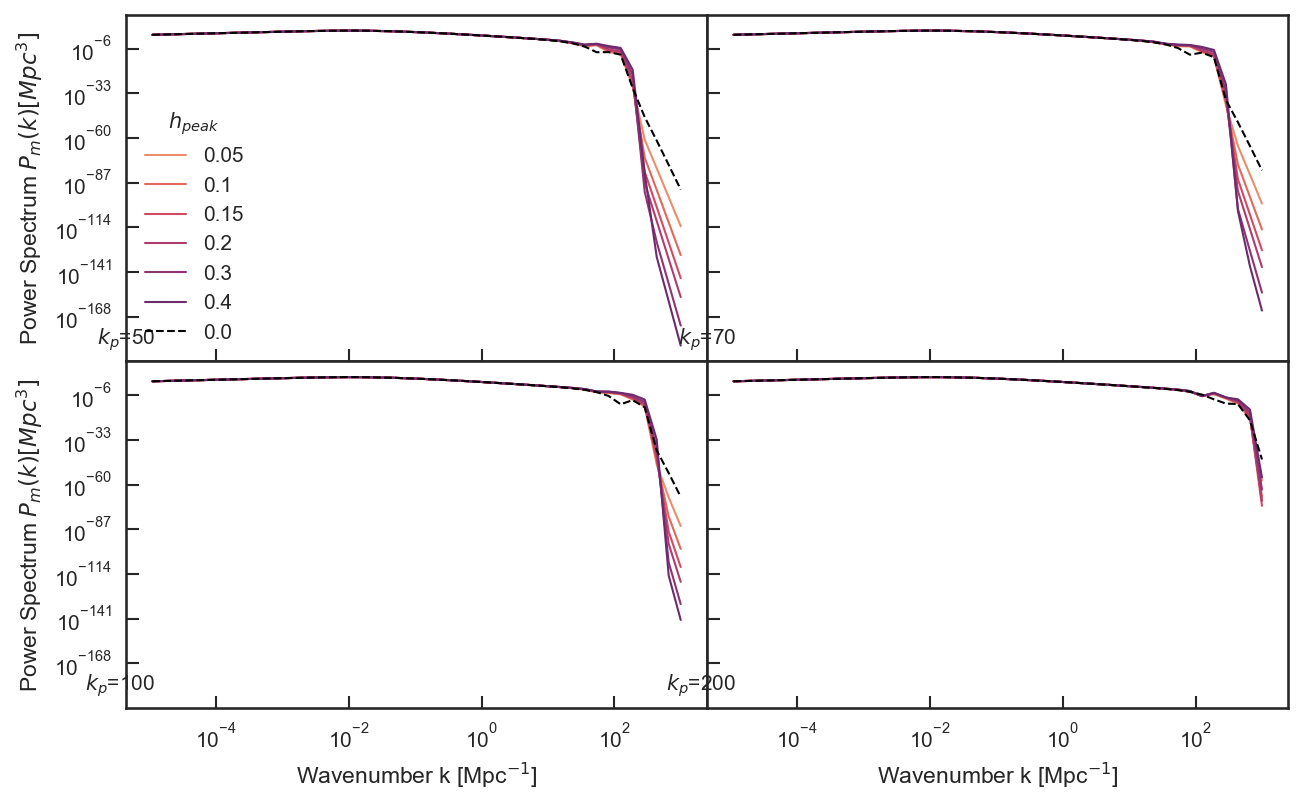

In [11]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

# Scalar mappable of normalized array to colormap
# Normalize the array vals so they can be mapped to a color

k = np.logspace(-2,np.log10(parcos.kmax_CLASS),1000)
for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        if hp == 0.0:
            ax[j].loglog(eth_zeus.klist,eth_zeus.CLASS_Pk*zeus21.T_ETHOS(eth_zeus.klist, kp, hp, c=-20)**2,'k--',lw=1, label=hp)  
        else:
            ax[j].loglog(eth_zeus.klist,eth_zeus.CLASS_Pk*zeus21.T_ETHOS(eth_zeus.klist, kp, hp, c=-20)**2, lw=1, label=hp)        

    ax[j].set_xlabel('Wavenumber k [Mpc$^{-1}$]')
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel('Power Spectrum $P_m(k) [Mpc^3]$')

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
        
    #ax[j].set_xlim(5e0,2*2.7e2)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='right', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

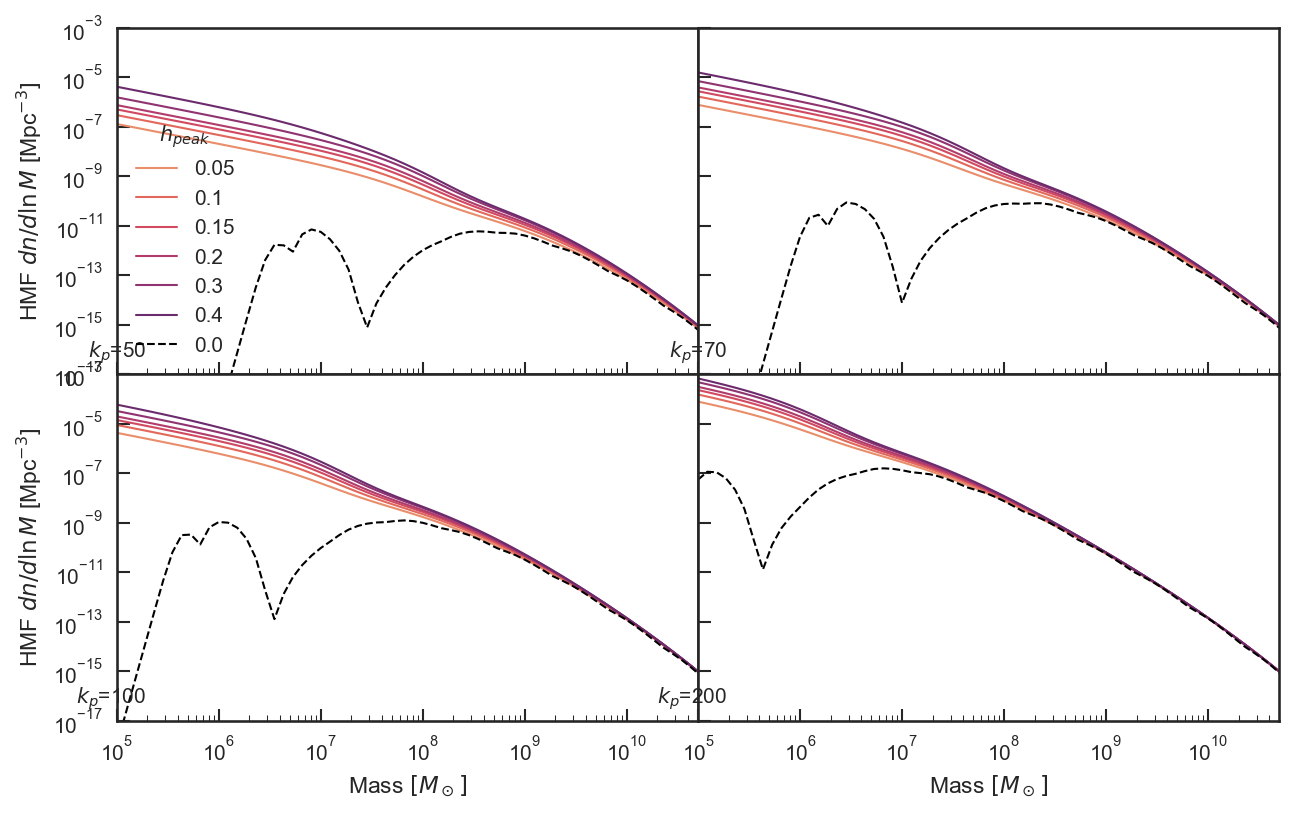

In [12]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

zchoose = 12

_iz = min(range(len(hmf_dict[hp,kp].zHMFtab)), key=lambda i: np.abs(hmf_dict[hp,kp].zHMFtab[i]-zchoose))

for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        if hp == 0.0:
            ax[j].loglog(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].HMFtab[:,_iz],'k--',  lw=1,label=hp)   
        else:
            ax[j].loglog(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].HMFtab[:,_iz], lw=1, label=hp)        

    ax[j].set_xlabel(r"Mass $[M_\odot]$")
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel(r"HMF $dn/d\ln{M}$ [Mpc$^{-3}$]")

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
       

    ax[j].set_xlim(10**5,5*10**10)
    ax[j].set_ylim(10**-17,10**-3)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='right', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

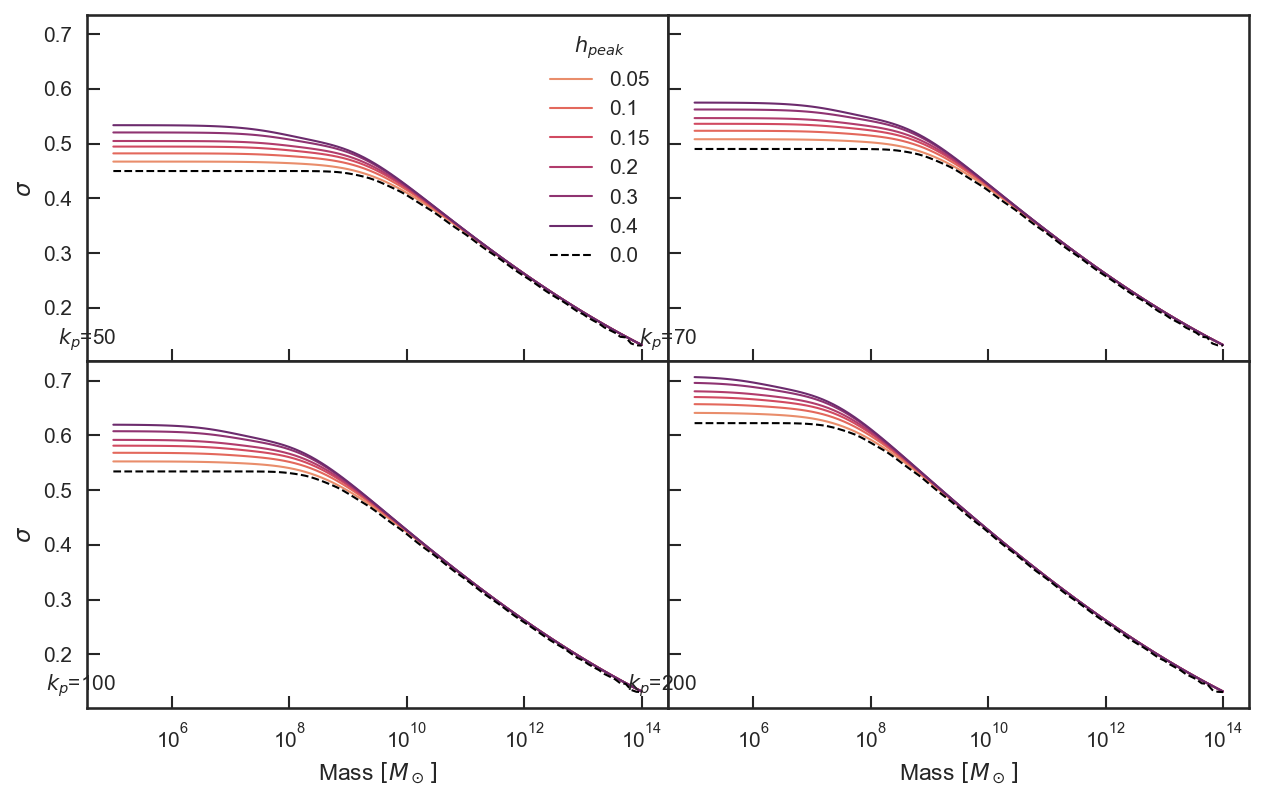

In [13]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

zchoose = 12

_iz = min(range(len(hmf_dict[hp,kp].zHMFtab)), key=lambda i: np.abs(hmf_dict[hp,kp].zHMFtab[i]-zchoose))

for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        if hp == 0.0:
            ax[j].semilogx(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].sigmaMhtab[:,_iz],'k--',  lw=1,label=hp)   
        else:
            ax[j].semilogx(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].sigmaMhtab[:,_iz], lw=1, label=hp)        

    ax[j].set_xlabel(r"Mass $[M_\odot]$")
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel(r"$\sigma$")

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
       

    #ax[j].set_xlim(10**5,5*10**10)
    #ax[j].set_ylim(10**-17,10**-3)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='right', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

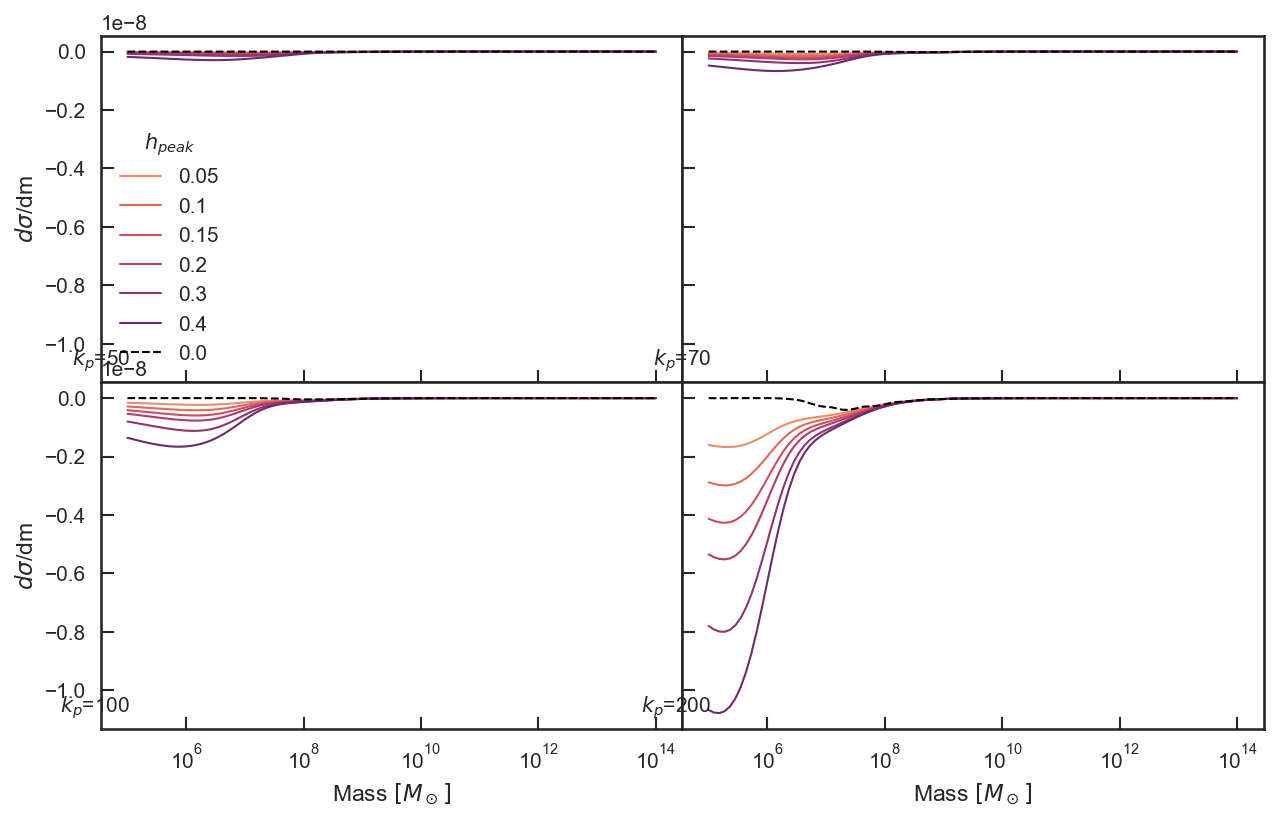

In [14]:
fig, ax = plt.subplots(2, int(len(k_peak)/2), 
                        sharex=True, sharey=True, figsize=(10,6))
ax = ax.ravel()

zchoose = 12

_iz = min(range(len(hmf_dict[hp,kp].zHMFtab)), key=lambda i: np.abs(hmf_dict[hp,kp].zHMFtab[i]-zchoose))

for j, kp in enumerate(k_peak):
    
    for i, hp in enumerate(h_peak):
        if hp == 0.0:
            ax[j].semilogx(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].dsigmadMMhtab[:,_iz],'k--',  lw=1,label=hp)   
        else:
            ax[j].semilogx(hmf_dict[hp,kp].Mhtab,hmf_dict[hp,kp].dsigmadMMhtab[:,_iz], lw=1, label=hp)        

    ax[j].set_xlabel(r"Mass $[M_\odot]$")
    
    if j==0 or j==int(len(k_peak)/2):
        ax[j].set_ylabel(r"$d\sigma$/dm")

    if j==0:
        ax[j].legend(title=r'$h_{peak}$')
       

    #ax[j].set_xlim(10**5,5*10**10)
    #ax[j].set_ylim(10**-17,10**-3)

    ax[j].annotate(f'$k_p$={kp}', xy=(0.05, 0.05), ha='right', xycoords='axes fraction')


fig.subplots_adjust(hspace=0., wspace=0.)

In [15]:

z = 10
parastro = zeus21.Astro_Parameters(parcos)
corrf = zeus21.Correlations(parcos,ClassyCosmo)


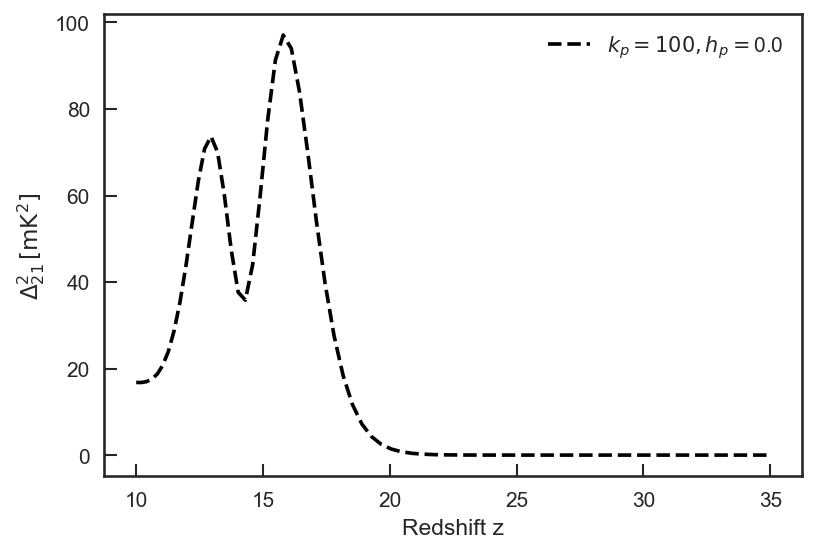

In [16]:
kchoose=0.2
h_peak = np.array([0.0 ])

for i in range(len(h_peak)):
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=h_peak[i], k_peak=100, Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    parastro = zeus21.Astro_Parameters(parcos)
    corrf = zeus21.Correlations(parcos,ClassyCosmo)
    T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
    klist = powerspec21.klist_PS
    zlist = T21_coeff.zintegral

    _ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))
    if i==0:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k--',label='$k_p = 100, h_{p}=$%s' % h_peak[i])
    else:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],label='$k_p = 100, h_{p}=$%s' % h_peak[i])
    plt.legend()

plt.xlabel(r'Redshift z')
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

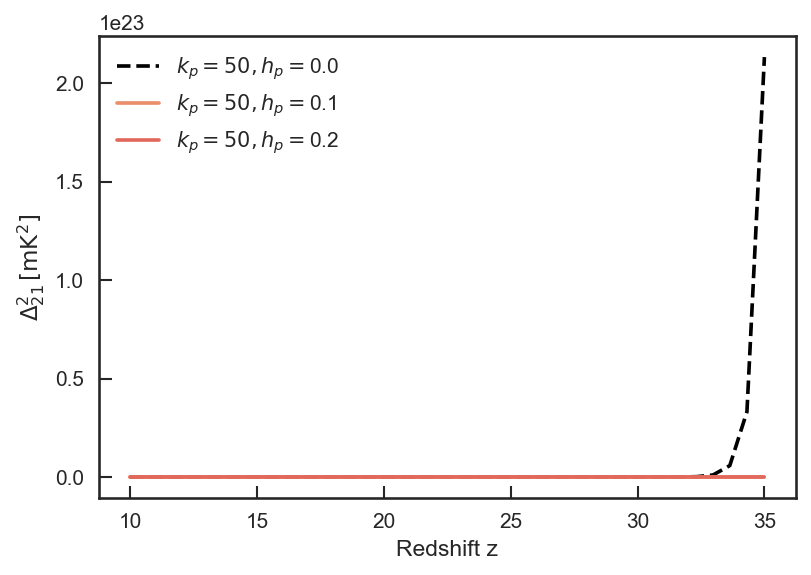

In [17]:
kchoose=0.2
h_peak = np.array([0,0.1,0.2])
for i in range(len(h_peak)):
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=h_peak[i], k_peak=50, Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    parastro = zeus21.Astro_Parameters(parcos)
    corrf = zeus21.Correlations(parcos,ClassyCosmo)
    T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
    klist = powerspec21.klist_PS
    zlist = T21_coeff.zintegral

    _ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))
    if i==0:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k--',label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    else:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    plt.legend()
    #plt.xlim(10,20)
    #plt.ylim(1e-1,1e21)

plt.xlabel(r'Redshift z')
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

In [18]:
kchoose=0.2
h_peak = np.array([0.1,0.2])
for i in range(len(h_peak)):
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=h_peak[i], k_peak=50, Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    parastro = zeus21.Astro_Parameters(parcos)
    corrf = zeus21.Correlations(parcos,ClassyCosmo)
    T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
    klist = powerspec21.klist_PS
    zlist = T21_coeff.zintegral

    _ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))
    if i==0:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k--',label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    else:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    plt.legend()
    #plt.xlim(10,20)
    #plt.ylim(1e-1,1e21)

plt.xlabel(r'Redshift z')
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

KeyboardInterrupt: 

KeyboardInterrupt: 

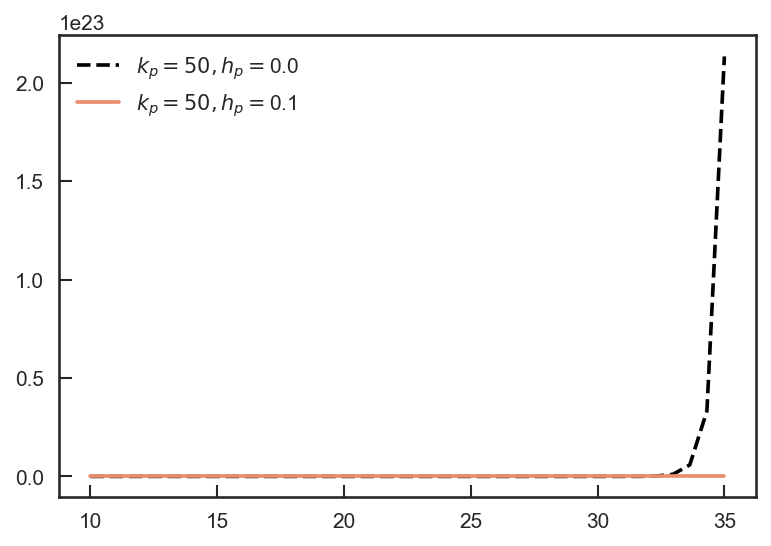

In [ ]:
kchoose=0.2
h_peak = np.array([0,0.1,0.2])
for i in range(len(h_peak)):
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=h_peak[i], k_peak=50, Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    parastro = zeus21.Astro_Parameters(parcos)
    corrf = zeus21.Correlations(parcos,ClassyCosmo)
    T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
    powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
    klist = powerspec21.klist_PS
    zlist = T21_coeff.zintegral

    _ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))
    if i==0:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k--',label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    else:
        plt.plot(zlist, powerspec21.Deltasq_T21[:,_ik],label='$k_p = 50, h_{p}=$%s' % h_peak[i])
    plt.legend()
    #plt.xlim(10,20)
    #plt.ylim(1e-1,0.2*1e21)

plt.xlabel(r'Redshift z')
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

KeyboardInterrupt: 

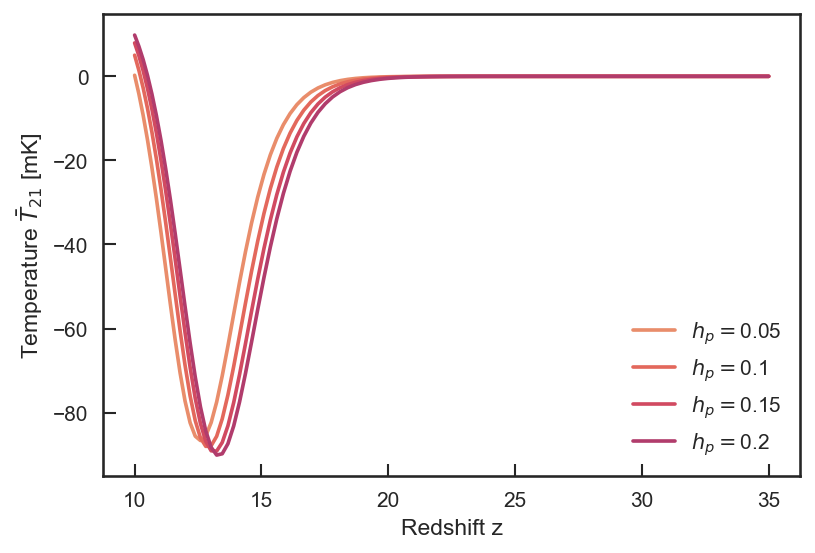

In [ ]:
fig, ax = plt.subplots()



plt.xlabel(r'Redshift z');
plt.ylabel(r'Temperature $\bar{T}_{21}$ [mK]');
#plt.xlim([10, 20])

k_peak = [50,100]#np.linspace(50,100,2)
hpeak = [0.05,0.1,0.15,0.2,0.3,0.0]#[0.2,0.4,0.8]
z=10

for j in range(0,len(hpeak)):
        
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=hpeak[j], k_peak=k_peak[0], Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=z)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    if hpeak[j] == 0.0:
        ax.plot(zlist,T21_coeff_ethos.T21avg ,'k--',label='$h_{p}=$%s' % hpeak[j])
    else:
        ax.plot(zlist,T21_coeff_ethos.T21avg ,label='$h_{p}=$%s' % hpeak[j])
    ax.legend()




In [61]:
parcos_ethos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=0, k_peak=50, Flag_ETHOS=True)
hmfint_ethos = zeus21.HMF_interpolator(parcos_ethos,ClassyCosmo)
parastro = zeus21.Astro_Parameters(parcos_ethos)
T21_coeff_ethos = zeus21.get_T21_coefficients(parcos_ethos, ClassyCosmo, parastro, hmfint_ethos, zmin=10)
powerspec21_ethos = zeus21.Power_Spectra(parcos_ethos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
zlist = T21_coeff_ethos.zintegral


In [91]:
with open('hmf_dict.pickle', 'rb') as f:
    hmf_dict= pickle.load(f)
parcos =  zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=0, k_peak=50, Flag_ETHOS=False)
hmf  = hmf_dict[0,50]#zeus21.HMF_interpolator(parcos_ethos, ClassyCosmo)
parastro = zeus21.Astro_Parameters(parcos)
T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmf, zmin=10)
powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
zlist = T21_coeff.zintegral

In [84]:
powerspec21_ethos._betaxa

array([6.96833279e-03, 9.30535555e-03, 1.25795557e-02, 1.72295561e-02,
       2.38700156e-02, 3.34704128e-02, 4.73430258e-02, 6.76603393e-02,
       9.72308625e-02, 1.40243224e-01, 2.02081621e-01, 2.90547941e-01,
       4.15431887e-01, 5.90779773e-01, 8.33786543e-01, 1.16896092e+00,
       1.62990577e+00, 2.26048286e+00, 3.12651436e+00, 4.31704083e+00,
       5.96245162e+00, 8.25667504e+00, 1.14736934e+01, 1.60367700e+01,
       2.25862874e+01, 3.20899104e+01, 4.60465588e+01, 6.68802313e+01,
       9.84069121e+01, 1.46732002e+02, 2.21954277e+02, 3.41060429e+02,
       5.32676947e+02, 8.46257984e+02, 1.36860242e+03, 2.25488571e+03,
       3.78819260e+03, 6.49483133e+03, 1.13747714e+04, 2.03646993e+04,
       3.73026383e+04, 6.99727492e+04, 1.34551005e+05, 2.65499824e+05,
       5.38121662e+05, 1.12139826e+06, 2.40557453e+06, 5.31949068e+06,
       1.21380860e+07, 2.86142035e+07, 6.97700675e+07, 1.76210672e+08,
       4.61694134e+08, 1.25745938e+09, 3.56309368e+09, 1.05192012e+10,
      

In [92]:
powerspec21._betaxa

array([3.07816633e-03, 3.95730203e-03, 5.14500952e-03, 6.77077749e-03,
       9.01308010e-03, 1.21504733e-02, 1.65560200e-02, 2.28655218e-02,
       3.19084903e-02, 4.49595009e-02, 6.37373407e-02, 9.08161036e-02,
       1.29609871e-01, 1.85048576e-01, 2.63333953e-01, 3.73105706e-01,
       5.25999538e-01, 7.36640170e-01, 1.02596335e+00, 1.42118780e+00,
       1.96001108e+00, 2.69597604e+00, 3.70054558e+00, 5.07923774e+00,
       6.98421684e+00, 9.63405348e+00, 1.33498105e+01, 1.86286188e+01,
       2.62139934e+01, 3.72178796e+01, 5.33865085e+01, 7.74835944e+01,
       1.13880915e+02, 1.69655612e+02, 2.56411471e+02, 3.93472218e+02,
       6.13596709e+02, 9.73162817e+02, 1.57108238e+03, 2.58357749e+03,
       4.33086749e+03, 7.40638143e+03, 1.29328619e+04, 2.30792178e+04,
       4.21254354e+04, 7.87070339e+04, 1.50679432e+05, 2.95928618e+05,
       5.96719640e+05, 1.23663507e+06, 2.63637351e+06, 5.78892456e+06,
       1.31098165e+07, 3.06665289e+07, 7.41576510e+07, 1.85614894e+08,
      

In [52]:
T21_coeff_ethos.xa_avg

array([1.75310492e+01, 1.54043207e+01, 1.34503799e+01, 1.16632038e+01,
       1.00451346e+01, 8.58577573e+00, 7.28787456e+00, 6.13204101e+00,
       5.12046450e+00, 4.24259842e+00, 3.49241657e+00, 2.85578053e+00,
       2.32231496e+00, 1.87781128e+00, 1.51182987e+00, 1.21178433e+00,
       9.66677317e-01, 7.67878105e-01, 6.06658794e-01, 4.76543279e-01,
       3.71895175e-01, 2.87986787e-01, 2.21270008e-01, 1.68490790e-01,
       1.27040650e-01, 9.48096073e-02, 7.00065176e-02, 5.10724500e-02,
       3.67937820e-02, 2.61832441e-02, 1.83930210e-02, 1.27435595e-02,
       8.70532005e-03, 5.85995460e-03, 3.88488917e-03, 2.53504902e-03,
       1.62708753e-03, 1.02652353e-03, 6.36099237e-04, 3.86910492e-04,
       2.30847332e-04, 1.35000476e-04, 7.73164284e-05, 4.33271475e-05,
       2.37380635e-05, 1.27051833e-05, 6.63656179e-06, 3.37918187e-06,
       1.67582606e-06, 8.08645347e-07, 3.79308780e-07, 1.72743627e-07,
       7.62787125e-08, 3.26088411e-08, 1.34847851e-08, 5.38749866e-09,
      

In [54]:
T21_coeff.xa_avg

array([1.75310492e+01, 1.54043207e+01, 1.34503799e+01, 1.16632038e+01,
       1.00451346e+01, 8.58577573e+00, 7.28787456e+00, 6.13204101e+00,
       5.12046450e+00, 4.24259842e+00, 3.49241657e+00, 2.85578053e+00,
       2.32231496e+00, 1.87781128e+00, 1.51182987e+00, 1.21178433e+00,
       9.66677317e-01, 7.67878105e-01, 6.06658794e-01, 4.76543279e-01,
       3.71895175e-01, 2.87986787e-01, 2.21270008e-01, 1.68490790e-01,
       1.27040650e-01, 9.48096073e-02, 7.00065176e-02, 5.10724500e-02,
       3.67937820e-02, 2.61832441e-02, 1.83930210e-02, 1.27435595e-02,
       8.70532005e-03, 5.85995460e-03, 3.88488917e-03, 2.53504902e-03,
       1.62708753e-03, 1.02652353e-03, 6.36099237e-04, 3.86910492e-04,
       2.30847332e-04, 1.35000476e-04, 7.73164284e-05, 4.33271475e-05,
       2.37380635e-05, 1.27051833e-05, 6.63656179e-06, 3.37918187e-06,
       1.67582606e-06, 8.08645347e-07, 3.79308780e-07, 1.72743627e-07,
       7.62787125e-08, 3.26088411e-08, 1.34847851e-08, 5.38749866e-09,
      

In [23]:
T21_coeff_ethos.Jalpha_avg

array([7.92153156e-10, 7.05240374e-10, 6.24474904e-10, 5.49601631e-10,
       4.80962105e-10, 4.18098017e-10, 3.61333940e-10, 3.09794238e-10,
       2.63772620e-10, 2.22864504e-10, 1.87003991e-10, 1.55661317e-10,
       1.28597057e-10, 1.05307260e-10, 8.55418397e-11, 6.88706150e-11,
       5.49227081e-11, 4.34051803e-11, 3.39527833e-11, 2.62921867e-11,
       2.01456483e-11, 1.52599703e-11, 1.14321262e-11, 8.46233063e-12,
       6.18520186e-12, 4.46350108e-12, 3.17928724e-12, 2.23192020e-12,
       1.54391302e-12, 1.05250503e-12, 7.06610478e-13, 4.66688508e-13,
       3.03125803e-13, 1.93506323e-13, 1.21328952e-13, 7.46670568e-14,
       4.50635858e-14, 2.66503603e-14, 1.54298346e-14, 8.73948271e-15,
       4.83854831e-15, 2.61607546e-15, 1.37991361e-15, 7.09365339e-16,
       3.55046325e-16, 1.72851348e-16, 8.17554346e-17, 3.75148758e-17,
       1.66838558e-17, 7.18244999e-18, 2.98969520e-18, 1.20154318e-18,
       4.65506875e-19, 1.73511502e-19, 6.21683398e-20, 2.13806113e-20,
      

In [24]:
(T21_coeff_ethos.xa_avg)

array([1.14898436e+01, 9.87858354e+00, 8.42995316e+00, 7.13477573e+00,
       5.99180737e+00, 4.98881898e+00, 4.12303313e+00, 3.37681662e+00,
       2.74573570e+00, 2.21670191e+00, 1.78002095e+00, 1.42139866e+00,
       1.13007161e+00, 8.93799888e-01, 7.03888588e-01, 5.51408861e-01,
       4.29264441e-01, 3.32095763e-01, 2.54880788e-01, 1.94002992e-01,
       1.46309713e-01, 1.09191373e-01, 8.06512665e-02, 5.88888051e-02,
       4.24708761e-02, 3.02475298e-02, 2.12649513e-02, 1.47349817e-02,
       1.00606707e-02, 6.76932217e-03, 4.48531439e-03, 2.92348497e-03,
       1.87379933e-03, 1.18027969e-03, 7.30139285e-04, 4.43284956e-04,
       2.63908483e-04, 1.53944888e-04, 8.79061268e-05, 4.91021688e-05,
       2.68070367e-05, 1.42910736e-05, 7.43207061e-06, 3.76646665e-06,
       1.85831237e-06, 8.91743052e-07, 4.15700937e-07, 1.87987887e-07,
       8.23853051e-08, 3.49476778e-08, 1.43327937e-08, 5.67502513e-09,
       2.16593611e-09, 7.95254319e-10, 2.80654984e-10, 9.50642522e-11,
      

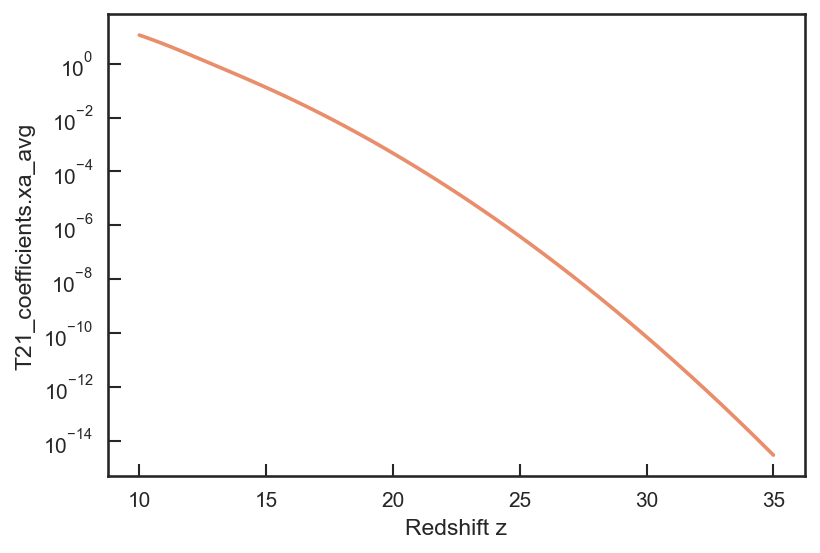

In [ ]:
plt.semilogy(zlist, T21_coeff_ethos.xa_avg)
#self._betad, self._betaxa, self._betaT, self._betaxio
# plt.xlabel(r'Redshift z')
plt.xlabel(r'Redshift z')
plt.ylabel(r'T21_coefficients.xa_avg');

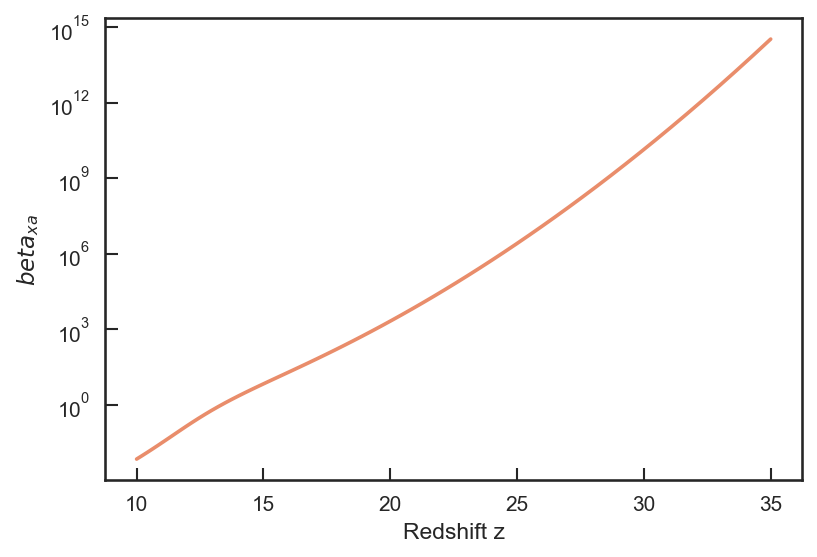

In [ ]:
plt.semilogy(zlist, powerspec21_ethos._betaxa)
plt.xlabel(r'Redshift z')
plt.ylabel(r'$beta_{xa}$');

In [ ]:
len(powerspec21_ethos._allbetas[1])

64

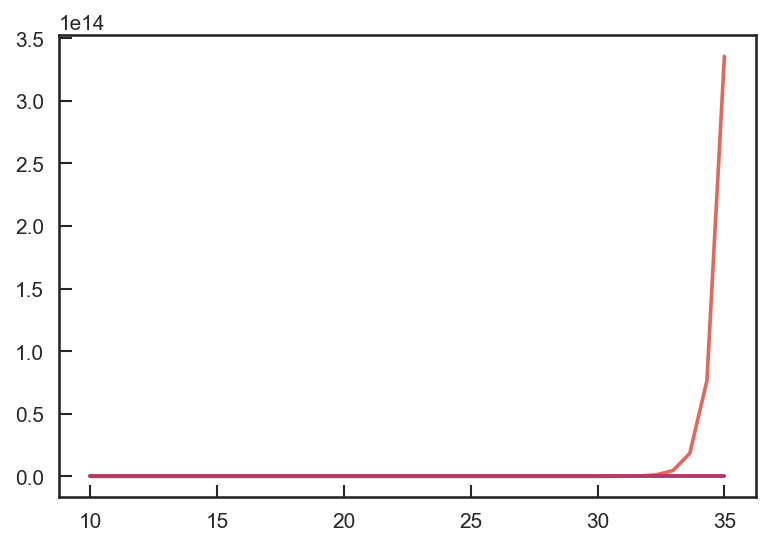

In [ ]:
for i in range(len(powerspec21_ethos._allbetas)):
    plt.plot(zlist,powerspec21_ethos._allbetas[i])

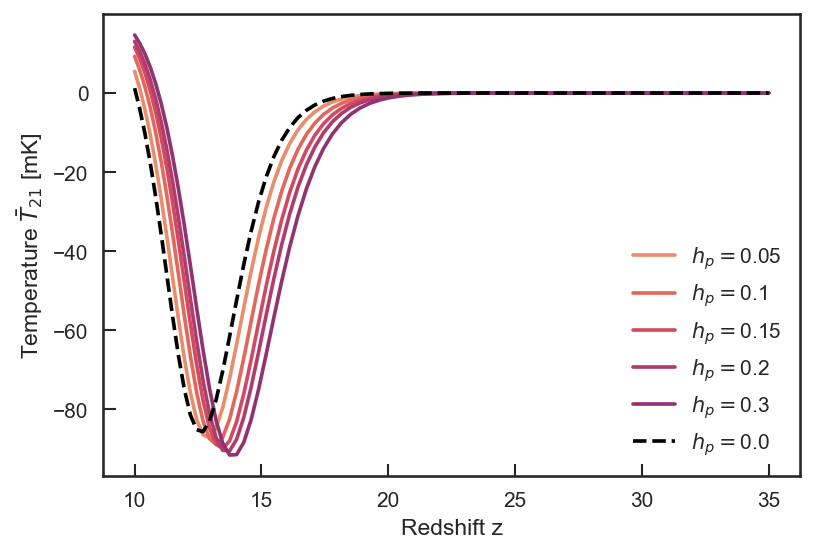

In [ ]:
fig, ax = plt.subplots()



plt.xlabel(r'Redshift z');
plt.ylabel(r'Temperature $\bar{T}_{21}$ [mK]');
#plt.xlim([10, 20])

k_peak = [50,100]#np.linspace(50,100,2)
hpeak = [0.05,0.1,0.15,0.2,0.3,0.0]#[0.2,0.4,0.8]
z=10

for j in range(0,len(hpeak)):
        
    parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo, h_peak=hpeak[j], k_peak=k_peak[0], Flag_ETHOS=True)
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo)
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=z)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    if hpeak[j] == 0.0:
        ax.plot(zlist,T21_coeff_ethos.T21avg ,'k--',label='$h_{p}=$%s' % hpeak[j])
    else:
        ax.plot(zlist,T21_coeff_ethos.T21avg ,label='$h_{p}=$%s' % hpeak[j])
    ax.legend()




In [ ]:
T_ETHOS_params = {'b':[-2.1,-3.7,4.1],
                  'd':[1.8,-6.7,2.5],
                  'tau':[0.03, 2.6, 0.27],
                  'sig':0.2}

h2_params = {'B':[1., 3., -0.32, -1.],
             'C':[0.54, 8., 0.7, 1.],
             'A':[0.8, 0.53,0.08],
             'A_skew':[0.17, 0.7, 0.2, -3]}

def T_ETHOS_smooth_TEST(k, k_peak, h_peak, c=-2):
    """
    Bohr+2020 parameterisation

    Args:
        k: array
        k_peak:
        h_peak: must be in h_model list
        c: cutoff = gamma, all cases - large negative gamma, doesn't make a difference
    """

    b   = f_exp(h_peak, *T_ETHOS_params['b'])
    d   = f_exp(h_peak, *T_ETHOS_params['d'])
    tau = f_exp(h_peak, *T_ETHOS_params['tau'])
    sig = T_ETHOS_params['sig']

    h2 = h2_model(h_peak, k_peak)

    alpha = d/k_peak * (1./np.sqrt(2)**(1./c)-1)**(1./b)*0.5

    peak2_ratio = 1.805
    x_peak1 = (k - k_peak)/k_peak
    x_peak2 = (k - peak2_ratio*k_peak)/k_peak

    parameterisation = np.abs(T(k, alpha, b, c) \
                       - np.sqrt(h_peak) * np.exp(-0.5*(x_peak1/sig)**2) \
                       + np.sqrt(h2)/4. * erfc(x_peak2/tau - 2) \
                              * erfc(- x_peak2/sig - 2) * np.cos(1.1083*np.pi*k/k_peak))


    print('b = %s' %b)
    print('d = %s' %d)
    print('tau = %s' %tau)
    print('sig = %s' %sig)
    print('a = %s' %alpha)
    print('h2 = %s' %h2)

def h2_model(h_peak, k_peak):
    """
    h2(h_peak, k_peak)
    """
    A = f_skewgauss(h_peak, *h2_params['A_skew']) #f_gauss(h_peak, *h2_params['A'])
    B = f_tanh(h_peak, *h2_params['B'])
    C = f_tanh2(h_peak, *h2_params['C'])
    print(A)
    return A*np.exp(B*k_peak) + C


def f_exp(h_peak, a, b, c):
    """
    exponential function
    """
    return a*np.exp(b*h_peak) + c

def f_tanh2(h_peak, a=0.6, b=3.3, c=0.6, d=1):
    """
    tanh function"""
    return a*(np.tanh(b*(h_peak-c))+d) - a*(np.tanh(-b*c)+d)

def f_tanh(h_peak, a=0.6, b=3.3, c=0.6, d=1):
    """
    tanh function
    """
    return a*(np.tanh(b*(h_peak-c))+d)


def f_gauss(h_peak, peak=0.8, h0=0.53, sig=0.08):
    """
    gaussian function
    """
    return peak * np.exp(-0.5*((h_peak-h0)/sig)**2.)

def f_skewgauss(h_peak, peak=0.16, h0=0.53, sig=0.08, alpha=0):
    """
    gaussian function
    """
    X = (h_peak - h0)/sig
    return peak/np.sqrt(2.*np.pi)/sig * np.exp(-0.5*X**2.) * (1 + scipy.special.erf(alpha*X/np.sqrt(2.)))

In [ ]:
h2_model(0, 100)

0.001483560581577795


1.1624940683338839e-14

In [ ]:
T_ETHOS_smooth_TEST(k, 50, 0.1, c=-2)

0.007534142300294627


NameError: name 'T' is not defined

In [ ]:
T_ETHOS_smooth_TEST(k, 50, 0, c=-2)

b = 1.9999999999999996
d = 4.3
tau = 0.30000000000000004
sig = 0.2
a = 0.018704116007981532
h2 = 1.4772082678285064e-05


In [ ]:
T_ETHOS_smooth_TEST(k, 100, 0.4, c=-2)

b = 3.621960854393993
d = 2.6234136774777004
tau = 0.3548765104305468
sig = 0.2
a = 0.008283309453302683
h2 = 0.024764286582626662


In [ ]:
T_ETHOS_smooth_TEST(k, 100, 0.2, c=-2)

b = 3.0980607774058275
d = 2.9713222034445868
tau = 0.3204608294909666
sig = 0.2
a = 0.008680160858394256
h2 = 0.00036850147051987716


In [ ]:
T_ETHOS_smooth_TEST(k, 100, 0.1, c=-2)

b = 2.6494579056615546
d = 3.4210754400157763
tau = 0.3089079025999732
sig = 0.2
a = 0.009124793413586504
h2 = 7.314464507147195e-05


In [ ]:
T_ETHOS_smooth_TEST(k, 100, 0, c=-2)

b = 1.9999999999999996
d = 4.3
tau = 0.30000000000000004
sig = 0.2
a = 0.009352058003990766
h2 = 1.4767929822977273e-05


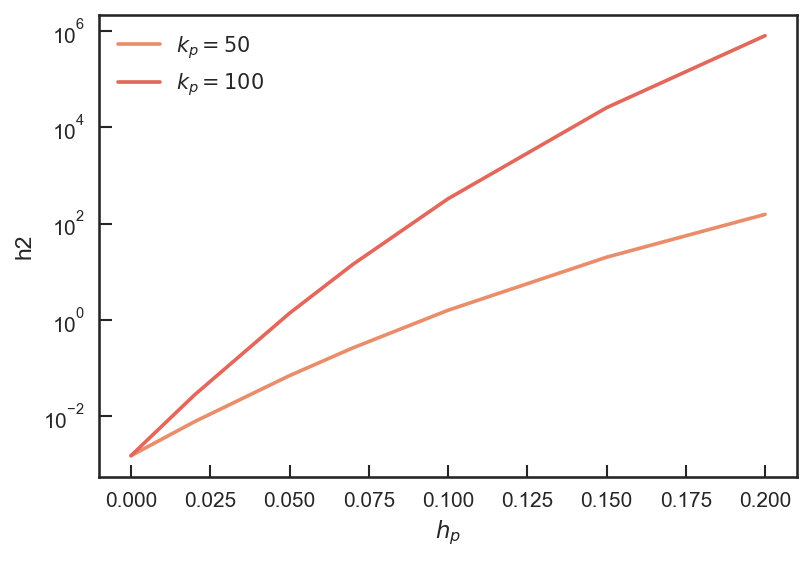

In [ ]:
h_peak = np.array([0,0.02,0.05,0.07,0.1,0.15,0.2,] )
h2_model(h_peak, 100)
plt.semilogy(h_peak,h2_model(h_peak, 50),label='$k_p = 50$')
plt.semilogy(h_peak,h2_model(h_peak, 100),label='$k_p = 100$')
#plt.ylim(1e-5,1e-3)
plt.ylabel('h2')
plt.xlabel('$h_p$')
plt.legend()

In [ ]:
h2_model(0, 50)

1.0 3.0 -0.32 -1.0


4.152866932732318e-09

In [ ]:
h2_model(0, 100)

1.0 3.0 -0.32 -1.0


1.1624940683338839e-14

In [ ]:
f_tanh(0, 0.54, 3.3, 0.7, 1)

0.010537198874515461

In [ ]:
f_tanh(0)f_tanh(0)

0.0

In [ ]:

A*np.exp(B*k_peak)

NameError: name 'A' is not defined